

Name - Vedant Kokane

*   Name - Vedant Kokane
*   Class - BE 4
*   Roll no - 41429

Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.Determine the number of clusters using the elbow method. Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data



In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')

In [11]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [13]:
df = df.drop(['ORDERNUMBER','CUSTOMERNAME','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME'],axis=1)

In [14]:
df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES        ORDERDATE  \
0               30      95.70                2  2871.00   2/24/2003 0:00   
1               34      81.35                5  2765.90    5/7/2003 0:00   
2               41      94.74                2  3884.34    7/1/2003 0:00   
3               45      83.26                6  3746.70   8/25/2003 0:00   
4               49     100.00               14  5205.27  10/10/2003 0:00   

    STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE COUNTRY  \
0  Shipped       1         2     2003  Motorcycles    95    S10_1678     USA   
1  Shipped       2         5     2003  Motorcycles    95    S10_1678  France   
2  Shipped       3         7     2003  Motorcycles    95    S10_1678  France   
3  Shipped       3         8     2003  Motorcycles    95    S10_1678     USA   
4  Shipped       4        10     2003  Motorcycles    95    S10_1678     USA   

  DEALSIZE  
0    Small  
1    Small  
2   Medium  
3   Medium  
4   Medium

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  PRODUCTCODE      2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 308.9+ KB


In [16]:
df.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [17]:
df = df.drop(['ORDERDATE','STATUS','MONTH_ID','YEAR_ID','QTR_ID'],axis=1)

In [18]:
df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  PRODUCTLINE  MSRP  \
0               30      95.70                2  2871.00  Motorcycles    95   
1               34      81.35                5  2765.90  Motorcycles    95   
2               41      94.74                2  3884.34  Motorcycles    95   
3               45      83.26                6  3746.70  Motorcycles    95   
4               49     100.00               14  5205.27  Motorcycles    95   

  PRODUCTCODE COUNTRY DEALSIZE  
0    S10_1678     USA    Small  
1    S10_1678  France    Small  
2    S10_1678  France   Medium  
3    S10_1678     USA   Medium  
4    S10_1678     USA   Medium

In [19]:
# converting the categorical values into numeric
from sklearn.preprocessing import LabelEncoder
def label_encoding(df,colName):
  le = LabelEncoder()
  df[colName] = le.fit_transform(df[colName])
  return df

In [20]:
df = label_encoding(df,'PRODUCTLINE')
df = label_encoding(df,'PRODUCTCODE')
df = label_encoding(df,'COUNTRY')
df = label_encoding(df,'DEALSIZE')

In [21]:
df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  PRODUCTLINE  MSRP  \
0               30      95.70                2  2871.00            1    95   
1               34      81.35                5  2765.90            1    95   
2               41      94.74                2  3884.34            1    95   
3               45      83.26                6  3746.70            1    95   
4               49     100.00               14  5205.27            1    95   

   PRODUCTCODE  COUNTRY  DEALSIZE  
0            0       18         2  
1            0        6         2  
2            0        6         1  
3            0       18         1  
4            0       18         1

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [26]:
# Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

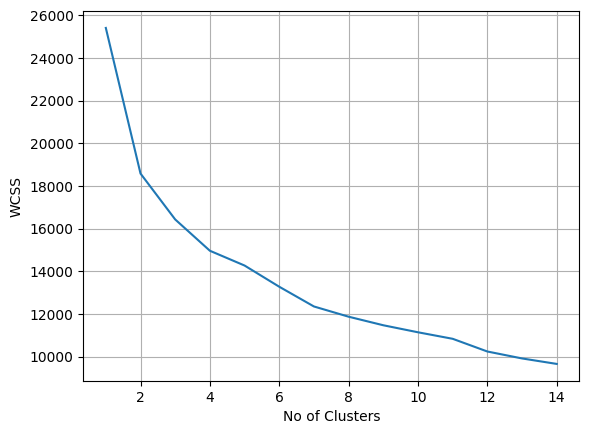

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()